In [1]:
%matplotlib inline
import pandas
import numpy
import matplotlib.pyplot
import seaborn
import sklearn.linear_model

In [2]:
masterdf = pandas.read_csv('master_sales.csv')
masterdf.head()

,Store Number,City,Zip Code,County,2015 Total Bottles Sold,2015 Average Margin Ratio,2015 Average Sale (Dollars),2015 Total Sales (Dollars),2015 Total Transactions,2015 Average Volume per Sale (Liters),...,Q1_16 Average Sale (Dollars),Q1_16 Total Sales (Dollars),Q1_16 Total Transactions,Q1_16 Average Volume per Sale (Liters),Q1_16 Total Volume Sold (Liters),Q1_16 DaysOpen,Q1_16 Average Price per Bottle (Dollars),Q1_16 Average Price per Liter (Dollars),Q1_16 Average Margin,Q1_16 Average Sales per Day
0,2106,CEDAR FALLS,50613,Black Hawk,99993,0.333940,281.070549,1434021.94,5102,18.420760,...,274.860903,337804.05,1229,18.126892,22277.95,13,15.718779,18.108258,91.670415,3712.132418
1,2113,GOWRIE,50543,Webster,6483,0.334248,63.015004,85763.42,1361,4.776510,...,55.309491,21736.63,393,4.091781,1608.07,13,15.965471,17.630111,18.473537,238.864066
2,2130,WATERLOO,50703,Black Hawk,72562,0.333923,280.624206,1108184.99,3949,16.602401,...,295.420857,306942.27,1039,17.490616,18172.75,14,15.243263,17.046762,98.523378,3372.991978
3,2178,WAUKON,52172,Allamakee,20504,0.334678,104.389020,277987.96,2663,8.156023,...,98.397162,58939.90,599,7.690551,4606.64,13,15.487229,16.942985,32.886995,647.691209
4,2190,DES MOINES,50314,Polk,107521,0.334113,95.491396,1228496.81,12865,5.005122,...,105.707629,332979.03,3150,5.266067,16588.11,41,19.315638,26.214457,35.261298,3659.110220


In [3]:
masterdf.columns

Index([u'Store Number', u'City', u'Zip Code', u'County',
       u'2015 Total Bottles Sold', u'2015 Average Margin Ratio',
       u'2015 Average Sale (Dollars)', u'2015 Total Sales (Dollars)',
       u'2015 Total Transactions', u'2015 Average Volume per Sale (Liters)',
       u'2015 Total Volume Sold (Liters)', u'2015 DaysOpen',
       u'2015 Average Price per Bottle (Dollars)',
       u'2015 Average Price per Liter (Dollars)', u'2015 Average Margin',
       u'2015 Average Sales per Day', u'Q1_15 Total Bottles Sold',
       u'Q1_15 Average Margin Ratio', u'Q1_15 Average Sale (Dollars)',
       u'Q1_15 Total Sales (Dollars)', u'Q1_15 Total Transactions',
       u'Q1_15 Average Volume per Sale (Liters)',
       u'Q1_15 Total Volume Sold (Liters)', u'Q1_15 DaysOpen',
       u'Q1_15 Average Price per Bottle (Dollars)',
       u'Q1_15 Average Price per Liter (Dollars)', u'Q1_15 Average Margin',
       u'Q1_15 Average Sales per Day', u'Q1_16 Total Bottles Sold',
       u'Q1_16 Average Margin 

In [4]:
masterdf[['2015 Total Sales (Dollars)', 'Q1_15 Total Bottles Sold',
          'Q1_15 Total Transactions', 'Q1_15 Average Margin', 'Q1_15 Average Volume per Sale (Liters)',
          'Q1_15 Total Volume Sold (Liters)', 'Q1_15 DaysOpen', 'Q1_15 Average Price per Liter (Dollars)',
          'Q1_15 Total Sales (Dollars)', 'Q1_16 Total Sales (Dollars)']].corr()

,2015 Total Sales (Dollars),Q1_15 Total Bottles Sold,Q1_15 Total Transactions,Q1_15 Average Margin,Q1_15 Average Volume per Sale (Liters),Q1_15 Total Volume Sold (Liters),Q1_15 DaysOpen,Q1_15 Average Price per Liter (Dollars),Q1_15 Total Sales (Dollars),Q1_16 Total Sales (Dollars)
2015 Total Sales (Dollars),1.000000,0.982228,0.722724,0.459229,0.438042,0.984736,0.544907,0.176475,0.992297,0.990002
Q1_15 Total Bottles Sold,0.982228,1.000000,0.745753,0.385413,0.377910,0.988474,0.570261,0.180174,0.989517,0.978990
Q1_15 Total Transactions,0.722724,0.745753,1.000000,0.035891,-0.003241,0.719506,0.618447,0.214151,0.700439,0.714466
Q1_15 Average Margin,0.459229,0.385413,0.035891,1.000000,0.946913,0.431339,0.072869,0.127968,0.435599,0.385968
Q1_15 Average Volume per Sale (Liters),0.438042,0.377910,-0.003241,0.946913,1.000000,0.443614,0.075310,-0.060531,0.427066,0.369991
Q1_15 Total Volume Sold (Liters),0.984736,0.988474,0.719506,0.431339,0.443614,1.000000,0.545137,0.130391,0.993682,0.975213
Q1_15 DaysOpen,0.544907,0.570261,0.618447,0.072869,0.075310,0.545137,1.000000,0.074854,0.536245,0.553919
Q1_15 Average Price per Liter (Dollars),0.176475,0.180174,0.214151,0.127968,-0.060531,0.130391,0.074854,1.000000,0.166205,0.166549
Q1_15 Total Sales (Dollars),0.992297,0.989517,0.700439,0.435599,0.427066,0.993682,0.536245,0.166205,1.000000,0.987290
Q1_16 Total Sales (Dollars),0.990002,0.978990,0.714466,0.385968,0.369991,0.975213,0.553919,0.166549,0.987290,1.000000


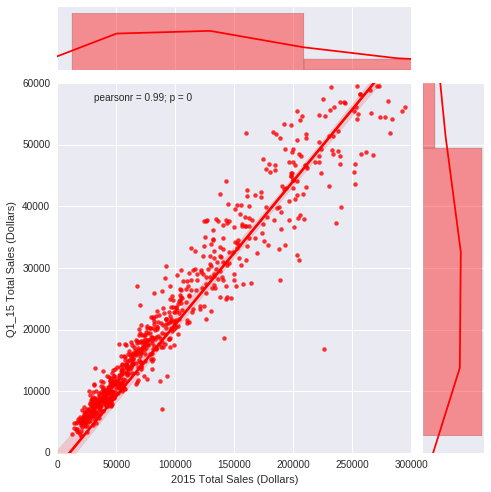

In [5]:
seaborn.jointplot(masterdf["2015 Total Sales (Dollars)"], y=masterdf["Q1_15 Total Sales (Dollars)"], kind="reg",
                  xlim=(0, 300000), ylim=(0, 60000), color="r", size=7)

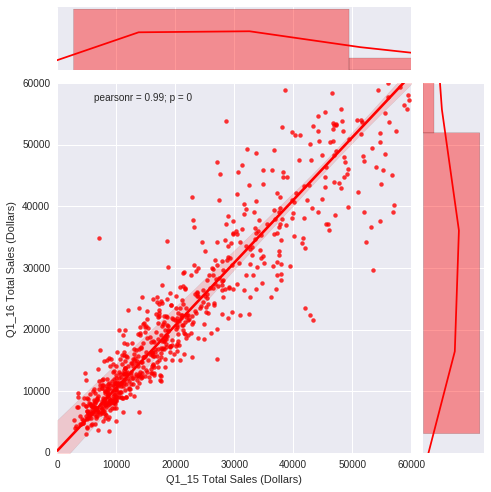

In [6]:
seaborn.jointplot(masterdf['Q1_15 Total Sales (Dollars)'], masterdf['Q1_16 Total Sales (Dollars)'], kind="reg",
                  xlim=(0, 60000), ylim=(0, 60000), color="r", size=7)

In [7]:
lm = sklearn.linear_model.Ridge()
X = masterdf[['Q1_15 Total Sales (Dollars)', 'Q1_15 Total Bottles Sold']]
y = masterdf["2015 Total Sales (Dollars)"]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model score:", lm.score(X, y)
print zip(X, lm.coef_), lm.intercept_

#matplotlib.pyplot.scatter(X, y, color='b')
#matplotlib.pyplot.scatter(X, predictions, color='r')
#matplotlib.pyplot.xlabel("Q1_15 Total Sales")
#matplotlib.pyplot.ylabel("2015 Total Sales")
#matplotlib.pyplot.show()

Model score: 0.984658157056
[('Q1_15 Total Sales (Dollars)', 4.1657665686151191), ('Q1_15 Total Bottles Sold', 1.1043980604067585)] 13519.2603923


Model score: 0.964771929744
[('Q1_15 Total Bottles Sold', 67.823445112252088)] -37228.3282529


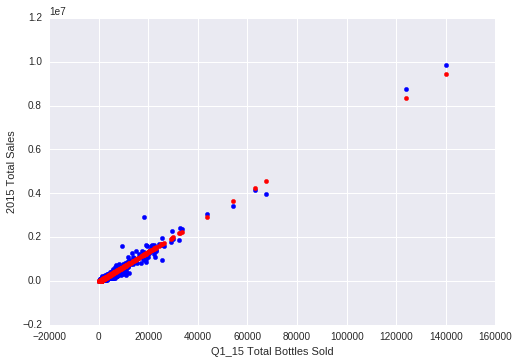

In [8]:
lm = sklearn.linear_model.Ridge()
X = masterdf[['Q1_15 Total Bottles Sold']]
y = masterdf["2015 Total Sales (Dollars)"]
lm.fit(X, y)
predictions = lm.predict(X)
print "Model score:", lm.score(X, y)
print zip(X, lm.coef_), lm.intercept_

matplotlib.pyplot.scatter(X, y, color='b')
matplotlib.pyplot.scatter(X, predictions, color='r')
matplotlib.pyplot.xlabel("Q1_15 Total Bottles Sold")
matplotlib.pyplot.ylabel("2015 Total Sales")
matplotlib.pyplot.show()



In [9]:
elastic = sklearn.linear_model.ElasticNetCV()
X = masterdf[['Q1_15 Total Sales (Dollars)', 'Q1_15 Total Bottles Sold']]
y = masterdf["2015 Total Sales (Dollars)"]
elastic.fit(X, y)
elastic_predict = elastic.predict(X)
print "Model score:", elastic.score(X, y)
print zip(X, elastic.coef_), elastic.intercept_

#matplotlib.pyplot.scatter(X, y, color='b')
#matplotlib.pyplot.scatter(X, elastic_predict, color='r')
#matplotlib.pyplot.xlabel("Q1_15 Total Sales")
#matplotlib.pyplot.ylabel("2015 Total Sales")
#matplotlib.pyplot.show()

Model score: 0.984626081788
[('Q1_15 Total Sales (Dollars)', 4.2112236141462169), ('Q1_15 Total Bottles Sold', 0.0)] 15784.9616404


In [10]:
x_scaler = sklearn.preprocessing.RobustScaler()
y_scaler = sklearn.preprocessing.RobustScaler()
scaled_X = x_scaler.fit_transform(X)
scaled_y = y_scaler.fit_transform(y)
elastic = sklearn.linear_model.ElasticNetCV()
elastic.fit(scaled_X, scaled_y)
elastic_predict = elastic.predict(scaled_X)
print "Model score:", elastic.score(scaled_X, scaled_y)
print elastic.coef_, elastic.intercept_

#matplotlib.pyplot.scatter(scaled_X, scaled_y, color='b')
#matplotlib.pyplot.scatter(scaled_X, elastic_predict, color='r')
#matplotlib.pyplot.xlabel("Q1_15 Total Sales")
#matplotlib.pyplot.ylabel("2015 Total Sales")
#matplotlib.pyplot.show()    


Model score: 0.984649451254
[ 0.90002031  0.04262874] 0.063950796923


/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:987: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

In [11]:
z = masterdf[['Q1_16 Total Sales (Dollars)', 'Q1_16 Total Bottles Sold']]
scaled_z = x_scaler.fit_transform(z)
scaled_predict_2016 = elastic.predict(scaled_z)
predictions_2016 = y_scaler.inverse_transform(scaled_predict_2016)
print "Real Total 2015 sales:", sum(masterdf['2015 Total Sales (Dollars)'])
print "Pred Total 2016 sales:", sum(predictions_2016)

Real Total 2015 sales: 255547255.63
Pred Total 2016 sales: 260606036.163


/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:1037: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


# By Zip Code

In [12]:
sales_zip = pandas.pivot_table(masterdf, index='Zip Code',
                   aggfunc={'2015 Total Sales (Dollars)': sum,
                            'Q1_15 Total Bottles Sold': sum,
                            'Q1_15 Average Sale (Dollars)': numpy.mean,
                            'Q1_15 Total Sales (Dollars)': sum, 
                            'Q1_15 Total Transactions': sum,
                            'Q1_15 Average Volume per Sale (Liters)': numpy.mean,
                            'Q1_15 Total Volume Sold (Liters)': sum, 
                            'Q1_15 Average Price per Bottle (Dollars)': numpy.mean,
                            'Q1_15 Average Price per Liter (Dollars)': numpy.mean, 
                            'Q1_15 Average Sales per Day': numpy.mean,
                            'Q1_16 Total Bottles Sold': sum,
                            'Q1_16 Average Sale (Dollars)': numpy.mean,
                            'Q1_16 Total Sales (Dollars)': sum,
                            'Q1_16 Total Transactions': sum,
                            'Q1_16 Average Volume per Sale (Liters)': numpy.mean,
                            'Q1_16 Total Volume Sold (Liters)': sum, 
                            'Q1_16 Average Price per Bottle (Dollars)': numpy.mean,
                            'Q1_16 Average Price per Liter (Dollars)': numpy.mean,
                            'Q1_16 Average Margin': numpy.mean,
                            'Q1_16 Average Sales per Day': numpy.mean
                            }
                   )
sales_zip[['2015 Total Sales (Dollars)', 'Q1_15 Total Bottles Sold', 'Q1_15 Average Sale (Dollars)',
          'Q1_15 Total Sales (Dollars)','Q1_15 Total Transactions', 'Q1_15 Average Volume per Sale (Liters)',
          'Q1_15 Total Volume Sold (Liters)', 'Q1_15 Average Price per Bottle (Dollars)',
          'Q1_15 Average Price per Liter (Dollars)', 'Q1_15 Average Sales per Day']].corr()

,2015 Total Sales (Dollars),Q1_15 Total Bottles Sold,Q1_15 Average Sale (Dollars),Q1_15 Total Sales (Dollars),Q1_15 Total Transactions,Q1_15 Average Volume per Sale (Liters),Q1_15 Total Volume Sold (Liters),Q1_15 Average Price per Bottle (Dollars),Q1_15 Average Price per Liter (Dollars),Q1_15 Average Sales per Day
2015 Total Sales (Dollars),1.000000,0.986028,0.406210,0.995675,0.910195,0.286872,0.989402,0.169402,0.334531,0.684754
Q1_15 Total Bottles Sold,0.986028,1.000000,0.367780,0.990838,0.933524,0.258892,0.992241,0.125029,0.332177,0.651173
Q1_15 Average Sale (Dollars),0.406210,0.367780,1.000000,0.392992,0.282218,0.919544,0.386679,0.277771,0.204034,0.413718
Q1_15 Total Sales (Dollars),0.995675,0.990838,0.392992,1.000000,0.906974,0.279845,0.994231,0.158927,0.325506,0.691696
Q1_15 Total Transactions,0.910195,0.933524,0.282218,0.906974,1.000000,0.186639,0.932641,0.140050,0.330297,0.532812
Q1_15 Average Volume per Sale (Liters),0.286872,0.258892,0.919544,0.279845,0.186639,1.000000,0.288812,0.128417,-0.075214,0.302091
Q1_15 Total Volume Sold (Liters),0.989402,0.992241,0.386679,0.994231,0.932641,0.288812,1.000000,0.150517,0.302547,0.657538
Q1_15 Average Price per Bottle (Dollars),0.169402,0.125029,0.277771,0.158927,0.140050,0.128417,0.150517,1.000000,0.374815,0.321782
Q1_15 Average Price per Liter (Dollars),0.334531,0.332177,0.204034,0.325506,0.330297,-0.075214,0.302547,0.374815,1.000000,0.362338
Q1_15 Average Sales per Day,0.684754,0.651173,0.413718,0.691696,0.532812,0.302091,0.657538,0.321782,0.362338,1.000000


In [13]:
X_zip = sales_zip[['Q1_15 Total Sales (Dollars)', 'Q1_15 Total Bottles Sold']]
y_zip = sales_zip['2015 Total Sales (Dollars)']
x_scaler_zip = sklearn.preprocessing.RobustScaler()
y_scaler_zip = sklearn.preprocessing.RobustScaler()
scaled_X_zip = x_scaler_zip.fit_transform(X_zip)
scaled_y_zip = y_scaler_zip.fit_transform(y_zip)
elastic_zip = sklearn.linear_model.ElasticNetCV()
elastic_zip.fit(scaled_X_zip, scaled_y_zip)
elastic_predict_zip = elastic_zip.predict(scaled_X_zip)
print "Model score:", elastic_zip.score(scaled_X_zip, scaled_y_zip)
print zip(X_zip.columns, elastic_zip.coef_), elastic_zip.intercept_

#matplotlib.pyplot.scatter(scaled_X_zip, scaled_y_zip, color='b')
#matplotlib.pyplot.scatter(scaled_X_zip, elastic_predict_zip, color='r')
#matplotlib.pyplot.xlabel("Q1_15 Total Sales")
#matplotlib.pyplot.ylabel("2015 Total Sales")
#matplotlib.pyplot.show()    

z_zip = sales_zip[['Q1_16 Total Sales (Dollars)', 'Q1_16 Total Bottles Sold']]
scaled_z_zip = x_scaler_zip.fit_transform(z_zip)
scaled_predict_2016_zip = elastic_zip.predict(scaled_z_zip)
predictions_2016_zip = y_scaler_zip.inverse_transform(scaled_predict_2016_zip)
print "Real Total 2015 sales:", sum(sales_zip['2015 Total Sales (Dollars)'])
print "Pred Total 2016 sales:", sum(predictions_2016_zip)

/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:987: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

Model score: 0.991356389133
[('Q1_15 Total Sales (Dollars)', 0.89811087612531382), ('Q1_15 Total Bottles Sold', 0.0083841048678861153)] 0.0261644587634
Real Total 2015 sales: 255547255.63
Pred Total 2016 sales: 251443867.317


/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:1037: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


# By County

In [14]:
sales_county = pandas.pivot_table(masterdf, index='County',
                   aggfunc={'2015 Total Sales (Dollars)': sum,
                            'Q1_15 Total Bottles Sold': sum,
                            'Q1_15 Average Sale (Dollars)': numpy.mean,
                            'Q1_15 Total Sales (Dollars)': sum, 
                            'Q1_15 Total Transactions': sum,
                            'Q1_15 Average Volume per Sale (Liters)': numpy.mean,
                            'Q1_15 Total Volume Sold (Liters)': sum, 
                            'Q1_15 Average Price per Bottle (Dollars)': numpy.mean,
                            'Q1_15 Average Price per Liter (Dollars)': numpy.mean, 
                            'Q1_15 Average Sales per Day': numpy.mean,
                            'Q1_16 Total Bottles Sold': sum,
                            'Q1_16 Average Sale (Dollars)': numpy.mean,
                            'Q1_16 Total Sales (Dollars)': sum,
                            'Q1_16 Total Transactions': sum,
                            'Q1_16 Average Volume per Sale (Liters)': numpy.mean,
                            'Q1_16 Total Volume Sold (Liters)': sum, 
                            'Q1_16 Average Price per Bottle (Dollars)': numpy.mean,
                            'Q1_16 Average Price per Liter (Dollars)': numpy.mean,
                            'Q1_16 Average Margin': numpy.mean,
                            'Q1_16 Average Sales per Day': numpy.mean
                            }
                   )
sales_county[['2015 Total Sales (Dollars)', 'Q1_15 Total Bottles Sold', 'Q1_15 Average Sale (Dollars)',
          'Q1_15 Total Sales (Dollars)','Q1_15 Total Transactions', 'Q1_15 Average Volume per Sale (Liters)',
          'Q1_15 Total Volume Sold (Liters)', 'Q1_15 Average Price per Bottle (Dollars)',
          'Q1_15 Average Price per Liter (Dollars)', 'Q1_15 Average Sales per Day']].corr()

,2015 Total Sales (Dollars),Q1_15 Total Bottles Sold,Q1_15 Average Sale (Dollars),Q1_15 Total Sales (Dollars),Q1_15 Total Transactions,Q1_15 Average Volume per Sale (Liters),Q1_15 Total Volume Sold (Liters),Q1_15 Average Price per Bottle (Dollars),Q1_15 Average Price per Liter (Dollars),Q1_15 Average Sales per Day
2015 Total Sales (Dollars),1.000000,0.997584,0.244679,0.999303,0.992739,0.106893,0.997593,-0.041792,0.425455,0.492059
Q1_15 Total Bottles Sold,0.997584,1.000000,0.225177,0.998745,0.996235,0.093862,0.998774,-0.056926,0.426089,0.489515
Q1_15 Average Sale (Dollars),0.244679,0.225177,1.000000,0.230118,0.221755,0.905148,0.232958,0.086088,0.182864,0.539976
Q1_15 Total Sales (Dollars),0.999303,0.998745,0.230118,1.000000,0.994708,0.097538,0.998942,-0.047714,0.420297,0.485511
Q1_15 Total Transactions,0.992739,0.996235,0.221755,0.994708,1.000000,0.088892,0.997471,-0.052814,0.440790,0.513394
Q1_15 Average Volume per Sale (Liters),0.106893,0.093862,0.905148,0.097538,0.088892,1.000000,0.104690,0.029737,-0.131852,0.429846
Q1_15 Total Volume Sold (Liters),0.997593,0.998774,0.232958,0.998942,0.997471,0.104690,1.000000,-0.050336,0.420648,0.499458
Q1_15 Average Price per Bottle (Dollars),-0.041792,-0.056926,0.086088,-0.047714,-0.052814,0.029737,-0.050336,1.000000,0.245129,0.282922
Q1_15 Average Price per Liter (Dollars),0.425455,0.426089,0.182864,0.420297,0.440790,-0.131852,0.420648,0.245129,1.000000,0.481462
Q1_15 Average Sales per Day,0.492059,0.489515,0.539976,0.485511,0.513394,0.429846,0.499458,0.282922,0.481462,1.000000


In [15]:
X_county = sales_county[['Q1_15 Total Sales (Dollars)', 'Q1_15 Total Bottles Sold']]
y_county = sales_county['2015 Total Sales (Dollars)']
x_scaler_county = sklearn.preprocessing.RobustScaler()
y_scaler_county = sklearn.preprocessing.RobustScaler()
scaled_X_county = x_scaler_county.fit_transform(X_county)
scaled_y_county = y_scaler_county.fit_transform(y_county)
elastic_county = sklearn.linear_model.ElasticNetCV()
elastic_county.fit(scaled_X_county, scaled_y_county)
elastic_predict_county = elastic_county.predict(scaled_X_county)
print "Model score:", elastic_county.score(scaled_X_county, scaled_y_county)
print elastic_county.coef_, elastic_county.intercept_

#matplotlib.pyplot.scatter(scaled_X_county, scaled_y_county, color='b')
#matplotlib.pyplot.scatter(scaled_X_county, elastic_predict_county, color='r')
#matplotlib.pyplot.xlabel("Q1_15 Total Sales")
#matplotlib.pyplot.ylabel("2015 Total Sales")
#matplotlib.pyplot.show()

z_county = sales_county[['Q1_16 Total Sales (Dollars)', 'Q1_16 Total Bottles Sold']]
scaled_z_county = x_scaler_county.fit_transform(z_county)
scaled_predict_2016_county = elastic_county.predict(scaled_z_county)
predictions_2016_county = y_scaler_county.inverse_transform(scaled_predict_2016_county)
print "Real Total 2015 sales:", sum(sales_county['2015 Total Sales (Dollars)'])
print "Pred Total 2016 sales:", sum(predictions_2016_county)

/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:987: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

Model score: 0.998495034375
[ 0.86686976  0.08860952] 0.0222239947157
Real Total 2015 sales: 255547255.63
Pred Total 2016 sales: 262198447.648


/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:965: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/useraj/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:1037: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
